In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as pl
import pandas as pd
import sys
sys.path.append("./src")
from pgm_io import PGMio

In [2]:
#############    Reading file    #############

pgm = PGMio("./data/mdb155.pgm") 

readed


In [3]:
pgm.header

{'type': 'P5', 'cols_rows': '1024 1024', 'maxValue': '255'}

In [4]:
print(pgm)


                    input_file: str
                    header: { type, cols_rows, maxValue }
                    data: [int]
                    matrixForm :[[int]]
                    cols: int
                    rows: int
                    output_file: str
                    writeFile(output_file:str)
                


In [5]:
print("success" if pgm.cols * pgm.rows == len(pgm.data) else "fail")

success


In [6]:
#############      Histogram    #############

df = pd.DataFrame(pgm.data)

df = df.rename(columns={0:"n"})

df.groupby(['n'])['n'].count()

n
0      394010
1         410
2        3246
3       13832
4       38159
        ...  
225       601
226       680
227       481
228       185
229        24
Name: n, Length: 230, dtype: int64

Text(0, 0.5, 'times')

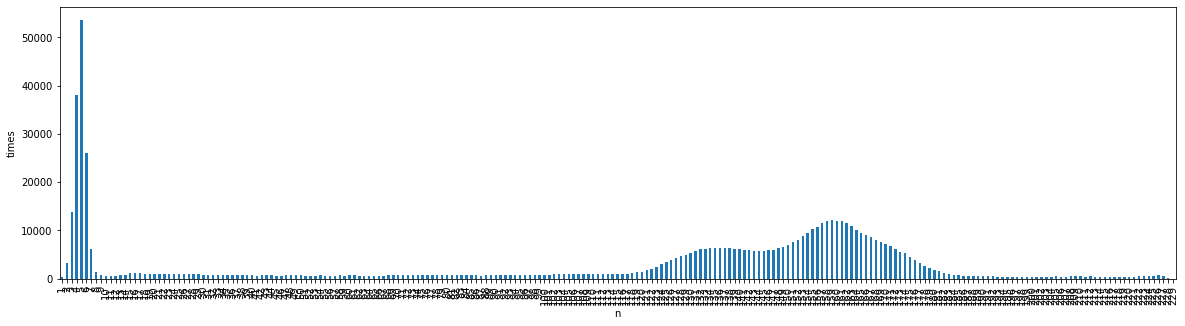

In [7]:
df2 = df.loc[df['n'] > 0] #without values of 0

f = pl.figure(figsize=(20,5)) #size of the figure, 20x + y5

ax = f.gca() 

df2.groupby(['n'])['n'].count().plot(kind="bar", x="n").set_ylabel("times") # Histogram

In [8]:
#############   average   #############

withoutZero = [e for e in pgm.data if e is not 0]

avg = sum(withoutZero)/len(withoutZero)

maxValue = max(withoutZero) 

minValue = min(withoutZero) 

z = (maxValue - minValue)/avg
z # value doesn't say nothing 

2.068064794658987

In [9]:
############# processing data  #############

#o = map(lambda x: 255 if x>z else 0,data) 

z = 190 #setting manually because the formula is wrong and it must change

o = map(lambda x: 0 if x>z else x, pgm.data) # applying transform

output = list(o)

In [10]:
############# writing a file  #############

pgm.data = output

pgm.writeFile("./data/mamaOutput.pgm")

./data/mamaOutput.pgm was written


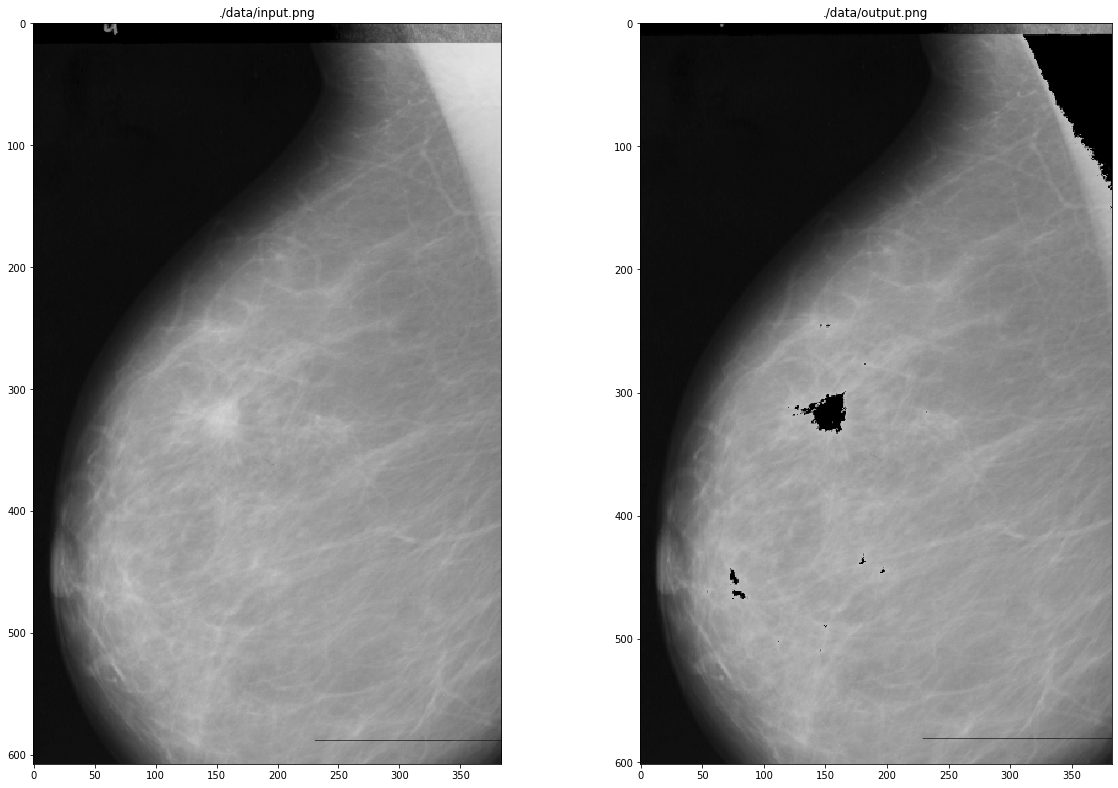

In [11]:
#############     input and output   ############# 

%matplotlib inline

images_name = ["./data/input.png","./data/output.png"]
images = [mpimg.imread(name) for name in images_name]

pl.figure(figsize=(20,30)) # size of the figure

columns = 2
for i, image in enumerate(images):
    pl.subplot(len(images) / columns + 1, columns, i + 1)
    pl.title(images_name[i])
    pl.imshow(image)